# 之前做的 前百分之一 后百分之一 有什么问题？

<!-- 太多不确定性 -->


---
### 因子实战 第四集 
# 打造自己的对冲基金：用Python实现系统高级对冲策略 （2）

##### “我不知道未来会发生什么，但我知道我会在那里等着它” - 沃伦·巴菲特

### 🎬 @大导演哈罗德
### 🏛 香港中文大学 金融工程 本科
### 📈 即将前往美国金融工程硕士之路（已经获得录取）
### 🌐 [关注我的Bilibili，看所有人都能听得懂有收获的量化学习内容！](https://space.bilibili.com/629573485)

🌟🌟🌟 一起揭开量化的神秘面纱！#哈罗德的亮化频道🌟

---

读取数据

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [16]:
df_mkt = pd.read_excel('Monthly_Market_Value_and_Return.xlsx', index_col=0) 
df_mkt.reset_index(inplace=True)
df_mkt['stock'] = df_mkt['stock'].map(lambda x: str(x).zfill(6))
unique_dates = df_mkt['date'].unique()
unique_dates.sort()
unique_dates_nochange = unique_dates.copy()
unique_dates = [datetime.strptime(date, "%Y-%m") for date in unique_dates]
df_mkt

,stock,date,value_in_thousand,monthly_return,next_month_return
0,000001,2005-12,11947347.99,0.051370,0.034202
1,000001,2006-01,12355970.65,0.034202,0.077165
2,000001,2006-02,13309423.50,0.077165,-0.068713
3,000001,2006-03,12394887.09,-0.068713,0.237049
4,000001,2006-04,15333078.53,0.237049,0.114213
...,...,...,...,...,...
419256,605599,2021-11,9636666.94,0.061697,0.086360
419257,605599,2021-12,10468889.19,0.086360,-0.116642
419258,605599,2022-01,9247778.04,-0.116642,0.105971
419259,605599,2022-02,10227778.07,0.105971,-0.170342


---
# 我们现在还有什么需要考虑？
## 有没有什么可能的问题？这种选股的策略是不是太过于激进？我们能不能得到一些对市场所有股票都适用的结论？

---

In [17]:
# 初始化每个组合的回报列表
df = df_mkt
portfolio_returns = {f'portfolio_{i}': [] for i in range(1, 6)}

for date in unique_dates_nochange:

    df_date = df[df['date'] == date]
    
    # 检查df_date是否为空
    if df_date.empty:
        # 如果为空，则跳过当前日期
        continue
    
    # 获取五个分位数的阈值
    thresholds = np.percentile(df_date['value_in_thousand'], [20, 40, 60, 80, 100])
    
    # 构建五个组合
    for i in range(5):
        if i == 0:
            # 第一个组合从最小值开始
            portfolio = df_date[df_date['value_in_thousand'] <= thresholds[i]]
        else:
            # 后续组合介于两个阈值之间
            portfolio = df_date[(df_date['value_in_thousand'] > thresholds[i-1]) & (df_date['value_in_thousand'] <= thresholds[i])]
        
        # 如果组合为空，则继续下一个循环
        if portfolio.empty:
            portfolio_return = 0  # 或者你可以选择跳过这个组合
        else:
            # 这里我还是看的下一个月的收益
            if not np.isnan(portfolio['next_month_return'].mean()):
                portfolio_return = portfolio['next_month_return'].mean()

        portfolio_returns[f'portfolio_{i+1}'].append(portfolio_return)

In [18]:
portfolio_returns

{'portfolio_1': [0.027722992537313435,
  0.0643448037735849,
  -0.01805112030075188,
  0.09262014015151518,
  0.6332695249042145,
  0.08352022656250001,
  0.009187888888888888,
  0.029257557251908397,
  0.08919776335877863,
  -0.008499924528301887,
  -0.008346078651685393,
  0.03371452962962963,
  0.28110787545787547,
  0.28903187867647057,
  0.2648607095588235,
  0.3373833321299639,
  0.1887175302491103,
  -0.2106304598540146,
  0.295230844765343,
  0.18833488489208636,
  0.03199436879432624,
  -0.1278350390070922,
  -0.0014661985815602836,
  0.20346631929824563,
  -0.05501680902777777,
  0.1108429897260274,
  -0.1697201404109589,
  -0.08845388054607509,
  -0.0017903027210884345,
  -0.233519322147651,
  0.12571061184210527,
  -0.21650382467532467,
  -0.11130129220779222,
  -0.22765513225806452,
  0.2209195483870968,
  0.141315,
  0.15571396153846154,
  0.1287466217948718,
  0.258650642172524,
  0.10885256549520766,
  0.09894257006369427,
  0.1035740160771704,
  0.13198727476038338,
  

In [19]:
hedge_returns = []
for i in range(len(portfolio_returns['portfolio_1'])):
    hedge_return = portfolio_returns['portfolio_1'][i] - portfolio_returns['portfolio_5'][i]
    hedge_returns.append(hedge_return)

average_returns = {portfolio: np.mean(returns) for portfolio, returns in portfolio_returns.items()}
average_hedge_return = np.mean(hedge_returns)

print("Average Returns by Portfolio:")
for portfolio, average_return in average_returns.items():
    print(f"{portfolio}: {average_return}")

print(f"Average Hedge Return: {average_hedge_return}")


Average Returns by Portfolio:
portfolio_1: 0.03632338665770842
portfolio_2: 0.0209551217564462
portfolio_3: 0.01726534987882018
portfolio_4: 0.014766130366628655
portfolio_5: 0.012561872521888598
Average Hedge Return: 0.023761514135819815


In [20]:
cumulative_portfolio_returns = {portfolio: np.cumsum(returns) for portfolio, returns in portfolio_returns.items()}
cumulative_hedge_returns = np.cumsum(hedge_returns)
final_cumulative_returns = {portfolio: returns[-1] if len(returns) > 0 else 0 for portfolio, returns in cumulative_portfolio_returns.items()}
final_cumulative_hedge_return = cumulative_hedge_returns[-1] if len(cumulative_hedge_returns) > 0 else 0
print("Final Cumulative Returns by Portfolio:")
for portfolio, final_return in final_cumulative_returns.items():
    print(f"{portfolio}: {final_return}")
print(f"Final Cumulative Hedge Return: {final_cumulative_hedge_return}")


Final Cumulative Returns by Portfolio:
portfolio_1: 7.119383784910844
portfolio_2: 4.107203864263453
portfolio_3: 3.3840085762487546
portfolio_4: 2.894161551859217
portfolio_5: 2.4621270142901657
Final Cumulative Hedge Return: 4.657256770620686


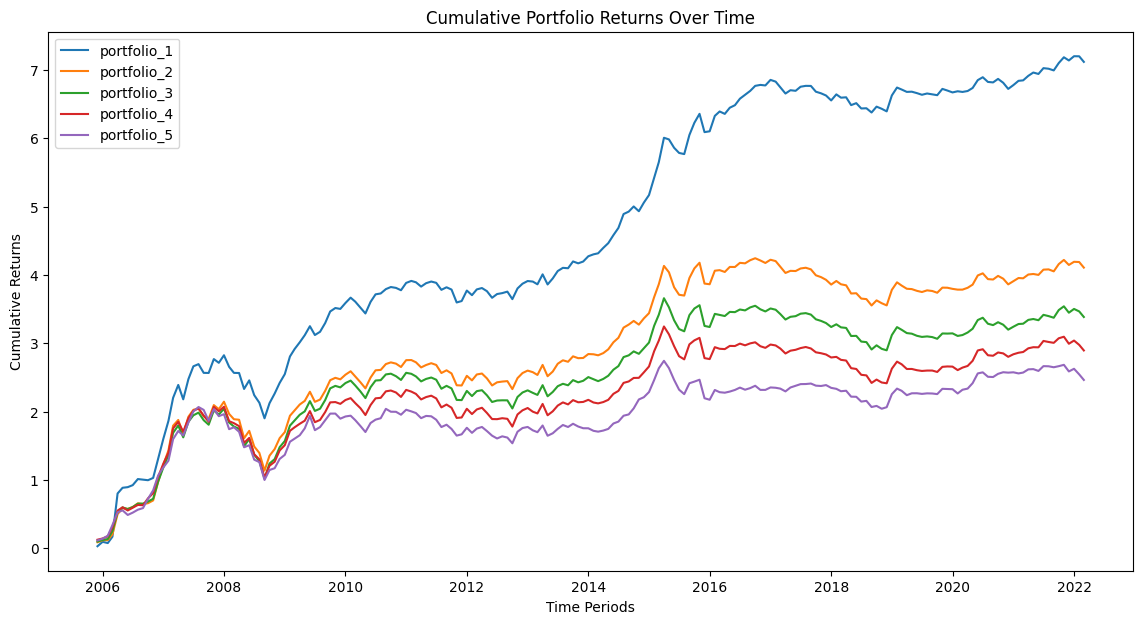

In [21]:
cumulative_portfolio_returns = {portfolio: np.cumsum(returns) for portfolio, returns in portfolio_returns.items()}
plt.figure(figsize=(14, 7))

for portfolio, returns in cumulative_portfolio_returns.items():
    plt.plot(unique_dates, returns, label=portfolio)

plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Time Periods')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


---

# 因子...?

你哈罗德不是说，可以根据一个因子确定一个股票的涨跌吗？

---